In [1]:
datadir = '/Users/krithigamurugavel/Downloads/gem5/Gem5_Plots/results'

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [3]:
import matplotlib

In [6]:
Configurations = ['run_config1','run_confgi2','run_config3']

all_arch = ['X86','ARM','RISCV']
zm_arch = ['X86']


all_memory_models = ['Slow', 'SingleCycle', 'Inf', 'Slow']
zm_memory_models = ['Slow']


all_Control_benchmarks_names = ['CCa','CCe','CCm','CCh','CCh_st','CRd','CRm','CRf','CF1','CS1','CS3']

all_Control_benchmarks = ['X86/run_config2/Slow/'+ bm for bm in all_Control_benchmarks_names]

Control_Recursive_names = ['CRd','CRm','CRf']
Control_Recursive =['X86/run_config2/Slow/'+bm for bm in Control_Recursive_names]

Control_Conditional_names = ['CCa','CCe','CCm','CCh','CCh_st']
Control_Conditional =['X86/run_config2/Slow/'+ bm for bm in Control_Conditional_names]

Control_Switch_names = ['CF1','CS1','CS3']
Control_Switch =['X86/run_config2/Slow/'+ bm for bm in Control_Switch_names]



In [15]:
all_gem5_cpus = ['Simple','DefaultO3','Minor']
zm_gem5_cpus = ['Simple']

all_gem5_bps = ['Local', 'BiMode', 'Tournament', 'LTAGE']
zm_gem5_bps = ['Local', 'BiMode', 'Tournament', 'LTAGE']


In [16]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        print(r[start:end])
        return float(r[start:end])

In [17]:
rows = []
for bm in all_Control_benchmarks:       
    for sys in zm_gem5_cpus:
        for bp in zm_gem5_bps:
            rows.append([bm, sys, bp,
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'sim_ticks')/333, #1000
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'sim_insts'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'sim_ops'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'sim_ticks')/1e12,
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'host_op_rate'),
                             #gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.BranchMispred'),
                             #gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.Branches'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.condIncorrect'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.condPredicted'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.RASInCorrect'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.usedRAS'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.indirectHits'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.indirectMisses'),
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPredindirectMispredicted'),  
                             gem5GetStat(bm+'/'+sys+'/'+sys+'_'+bp, 'system.cpu.branchPred.indirectLookups'),
                            ])
            
vrg_df1 = pd.DataFrame(rows, columns=['benchmark', 'cpu','bp','cycles', 'instructions', 'ops', 'time', 
                                      'host_op_rate','condIncorrect', 'condPredicted','RASIncorrect',
                                      'RASUsed', 'indirectHits', 'indirectMisses','indirectMispredicted','indirectLookups'])
vrg_df1['ipc'] = vrg_df1['instructions']/vrg_df1['cycles']
vrg_df1['cond_miss_rate'] = vrg_df1['condIncorrect']/vrg_df1['condPredicted']
vrg_df1['miss_rate_indirectbuffer']=vrg_df1['indirectMisses']/((vrg_df1['indirectLookups']))


                                   48254031                       
                                      47275                       
                                        86568                       
                                   48254031                       
                                  694621                       
              959                       
             9237                       
                 0                       
                    120                       
              7990                       
             297                       
         262                       
           8287                       
                                   48254031                       
                                      47275                       
                                        86568                       
                                   48254031                       
                                 1099051                       
    

In [30]:
def draw_vertical_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black', lw = 1)
    line.set_clip_on(False)
    ax.add_line(line)


In [35]:
def doplot_Control_benchmark(cpus,benchmarks,benchmark_names,stat,norm=True):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    i = 0
    for cpu in cpus:
        for bm in benchmarks:
            base = vrg_df1[(vrg_df1['benchmark']==bm)][stat].iloc[0] if norm else 1
            for j,sys in enumerate(zm_gem5_cpus):
                d = vrg_df1[(vrg_df1['cpu']==sys) & (vrg_df1['benchmark']==bm)]
                for k,bp in enumerate(zm_gem5_bps):
                    e = vrg_df1[(vrg_df1['bp']==bp) & (vrg_df1['cpu']==sys) & (vrg_df1['benchmark']==bm)]
                    ax.bar(i, e[stat].iloc[0]/base, color='C'+str(k))
                    i += 1
                i += 1
    for i,bp in enumerate(zm_gem5_bps):
        plt.bar(0,0,color='C'+str(i), label=bp)
    new_names = benchmark_names + benchmark_names
    plt.xticks(np.arange(len(new_names))*(len(zm_gem5_cpus)+1)+i/2, new_names, rotation=40, ha='right')
    draw_vertical_line(ax, 0, -0.1)
    draw_vertical_line(ax, 0.5, -0.1)
    draw_vertical_line(ax, 1, -0.1)
    ax.text(0.25, -0.25, cpus[0], ha ='center', transform=ax.transAxes)
    ax.text(0.5, -0.25, cpu[1], ha ='center', transform=ax.transAxes)
   # ax.text(0.75, -0.25, size[2], ha ='center', transform=ax.transAxes)
    plt.xticks(np.arange(len(benchmark_names))*(len(zm_gem5_bps)+1)+i/2, benchmark_names, rotation=40, ha='right')

<IPython.core.display.Javascript object>


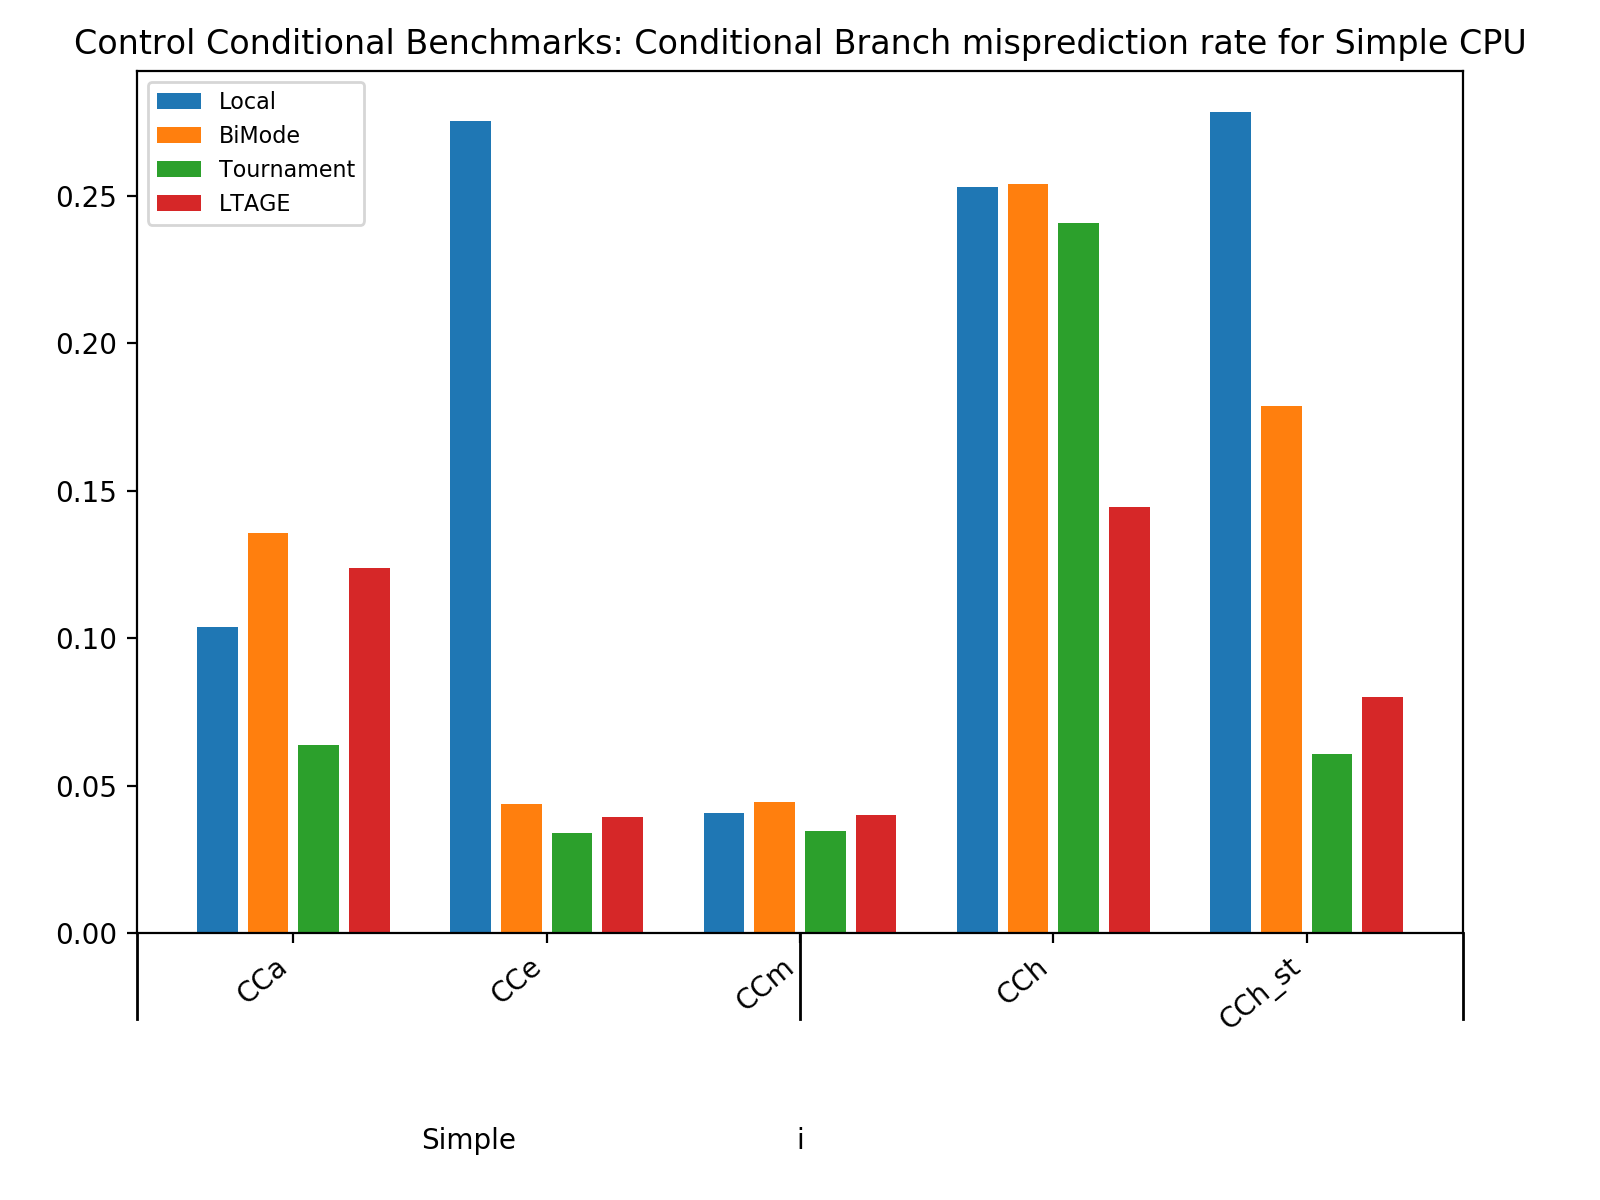

In [36]:
benchmarks = Control_Conditional
benchmark_names = Control_Conditional_names
cpus = zm_gem5_cpus
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
doplot_Control_benchmark(cpus,benchmarks,benchmark_names,'cond_miss_rate',norm=False)
plt.ylabel('')
new_names = benchmark_names + benchmark_names
#plt.xlabel(zm_gem5_cpus, fontdict=None, labelpad=(np.arange(len(zm_gem5_cpus))*(len(new_names)+1)+i/2))
plt.legend(loc=2, prop={'size': 8})
plt.title('Control Conditional Benchmarks: Conditional Branch misprediction rate for Simple CPU')
plt.tight_layout()
plt.savefig('conditional_branch_missrate(8000_Simple).png', format='png', dpi=600)

<IPython.core.display.Javascript object>


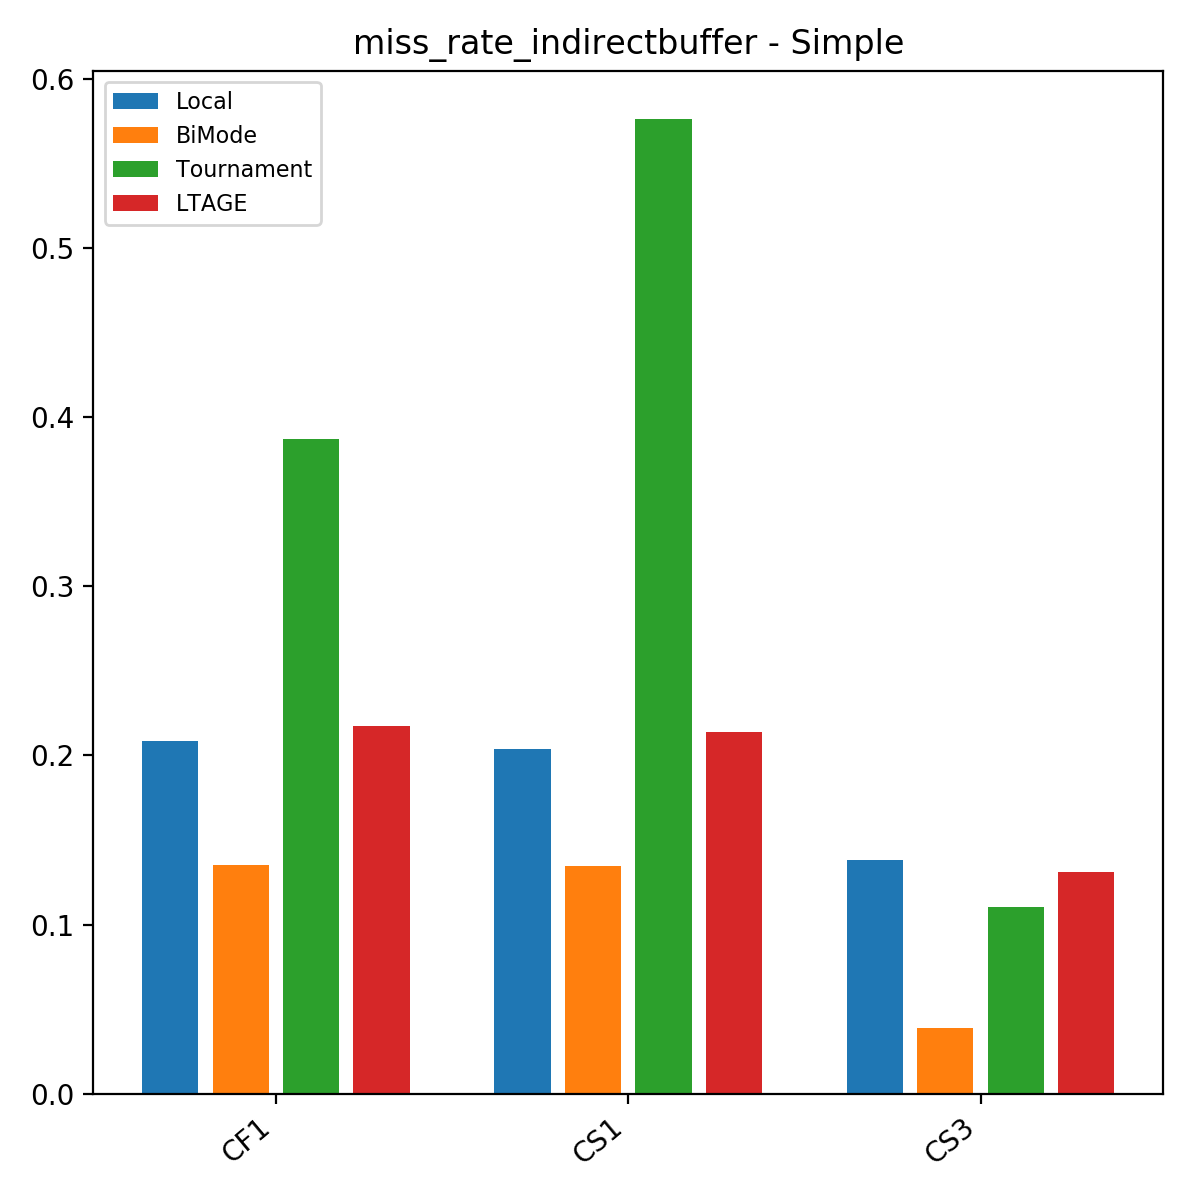

In [21]:
benchmarks = Control_Switch
benchmark_names = Control_Switch_names
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
doplot_Control_benchmark(benchmarks,benchmark_names,'miss_rate_indirectbuffer',norm=False)
plt.ylabel('')
plt.legend(loc=2, prop={'size': 8})
plt.title('miss_rate_indirectbuffer - Simple')
plt.tight_layout()
plt.savefig('miss_rate_indirectbuffer_simple.png', format='png', dpi=600)